In [1]:
import os
import pandas as pd
import numpy as np
import json
import random, string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#../input/blood-multiclass/Update_train.csv

In [3]:
#maindir = "../input/blood-multiclass/OrginalData" # Directory with your files
maindir="../input/blood-multiclass"
traincsv = maindir+"/Update_train.csv"
testcsv = maindir+"/Updated_Test.csv"

In [4]:
train_trim=maindir+"/Train_trimmed.csv"

## Quick look at the DATA

In [5]:
train = pd.read_csv(traincsv)
train.head(6826)

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance168,absorbance169,id,std,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,donation_id
0,0.520883,0.528200,0.529795,0.537382,0.540265,0.546260,0.550882,0.558865,0.571352,0.585775,...,1.319344,1.278294,0,0.0026,39.27,44.17,low,ok,high,2250
1,0.529109,0.534852,0.541075,0.544269,0.546594,0.555183,0.561367,0.567637,0.582427,0.595801,...,1.282723,1.267465,1,0.0026,39.39,44.09,low,ok,high,2250
2,0.528434,0.532036,0.540413,0.541964,0.549347,0.555902,0.561458,0.567824,0.579568,0.593048,...,1.287730,1.266464,2,0.0026,39.50,44.00,low,ok,high,2250
3,0.530528,0.531880,0.539558,0.542433,0.549097,0.556224,0.561398,0.566963,0.577525,0.591982,...,1.314408,1.342224,3,0.0026,39.60,43.89,low,ok,high,2250
4,0.527530,0.536424,0.538207,0.541504,0.550546,0.555203,0.560394,0.567352,0.579438,0.592049,...,1.268710,1.216146,4,0.0026,39.70,43.83,low,ok,high,2250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6821,0.497821,0.494844,0.501070,0.501647,0.507166,0.512051,0.518672,0.525469,0.534406,0.549073,...,1.290584,1.306680,6821,0.0047,38.49,36.93,ok,ok,high,2489
6822,0.491826,0.492974,0.497305,0.501740,0.509512,0.513448,0.518100,0.524419,0.535479,0.548758,...,1.271229,1.296271,6822,0.0047,38.55,36.83,ok,ok,high,2489
6823,0.490847,0.495491,0.500684,0.501307,0.509372,0.511848,0.519052,0.523606,0.534536,0.549323,...,1.328993,1.282837,6823,0.0047,38.62,36.78,ok,ok,high,2489
6824,0.502596,0.499039,0.506144,0.510731,0.513519,0.518911,0.524625,0.532740,0.540208,0.554289,...,1.314167,1.261396,6824,0.0047,38.70,36.73,ok,ok,high,2489


In [6]:
#donation_id 6824
train.iloc[6822:6827,:].head()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance168,absorbance169,id,std,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,donation_id
6822,0.491826,0.492974,0.497305,0.501740,0.509512,0.513448,0.518100,0.524419,0.535479,0.548758,...,1.271229,1.296271,6822,0.0047,38.55,36.83,ok,ok,high,2489
6823,0.490847,0.495491,0.500684,0.501307,0.509372,0.511848,0.519052,0.523606,0.534536,0.549323,...,1.328993,1.282837,6823,0.0047,38.62,36.78,ok,ok,high,2489
6824,0.502596,0.499039,0.506144,0.510731,0.513519,0.518911,0.524625,0.532740,0.540208,0.554289,...,1.314167,1.261396,6824,0.0047,38.70,36.73,ok,ok,high,2489
6825,0.493357,0.496229,0.496609,0.501502,0.508929,0.510667,0.516772,0.523859,0.534536,0.549025,...,1.310669,1.346270,6825,0.0047,38.73,36.68,ok,ok,high,2489
6826,0.491207,0.497775,0.498514,0.501657,0.509590,0.514705,0.518758,0.526698,0.534942,0.549467,...,1.339663,1.321329,6826,0.0047,38.79,36.65,ok,ok,high,2489


In [7]:
-2.793790
train.loc[train["absorbance0"]==-2.793790]

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance168,absorbance169,id,std,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,donation_id


In [8]:
#train_tr = pd.read_csv(train_trim)
#train_tr.head()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29160 entries, 0 to 29159
Columns: 178 entries, absorbance0 to donation_id
dtypes: float64(173), int64(2), object(3)
memory usage: 39.6+ MB


In [10]:
train.describe()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,id,std,temperature,humidity,donation_id
count,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,...,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000
mean,0.501233,0.505343,0.509430,0.513951,0.520390,0.527901,0.534790,0.539878,0.547992,0.560161,...,1.256808,1.250286,1.247337,1.261093,1.249279,18395.467078,0.007525,41.243166,35.340352,6647.707819
std,0.154276,0.114408,0.108543,0.131905,0.130735,0.127874,0.115413,0.122235,0.120122,0.121974,...,0.147095,0.157714,0.165125,0.172043,0.142374,11516.122819,0.004625,2.833117,8.700879,3036.003039
min,-2.793790,-1.875939,-1.733555,-2.270881,-2.239499,-2.172958,-1.870428,-2.021362,-1.963416,-1.990968,...,-1.399953,-1.618211,-1.746980,-1.840234,-0.995391,0.000000,0.002400,30.480000,16.610000,1975.000000
25%,0.486140,0.488110,0.491822,0.496990,0.502719,0.509847,0.516403,0.522104,0.530236,0.542101,...,1.209375,1.198047,1.191282,1.200460,1.187413,7289.750000,0.004500,39.180000,28.300000,3593.000000
50%,0.509431,0.511737,0.515532,0.521206,0.527353,0.534120,0.540330,0.546182,0.554205,0.567028,...,1.259995,1.253789,1.251885,1.264090,1.250164,21499.500000,0.006100,41.200000,35.295000,6428.500000
75%,0.530501,0.532439,0.536944,0.542858,0.549445,0.556553,0.563126,0.568506,0.576613,0.589161,...,1.313490,1.312229,1.311609,1.328095,1.314102,28789.250000,0.008900,43.130000,41.190000,9326.000000
max,0.657782,0.652291,0.659153,0.658982,0.659410,0.667296,0.672708,0.680601,0.691116,0.704255,...,1.606844,1.586301,1.657884,1.672314,1.738621,36079.000000,0.028700,52.690000,67.820000,11906.000000


The goal of the competition is use the abosrbance which is spectrum to predict the hdl_cholesterol, hemoglobin and ldl_cholestorl level. These can either be low, ok or high. The absobance spectrum has 170 values over the entier frequency range. In the dataset with labels trim, the edges of the absorbance spectrum have been trimmed by Bloods-ai because they believed the edges are noisy. 

It is up to you to experiment and decide if woriking with the full range or trim range prvents the best results.

Note that the each measurement actually contains, 60 scans so a lot of the data will actually just be scans of the same measurement. So it is up to you to make sure your model doesn't overfit and is reliable to the limited variation of the data. The plan is to collect and add more data while the competion is running.

### Visualization

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hdl_cholesterol_human', ylabel='count'>

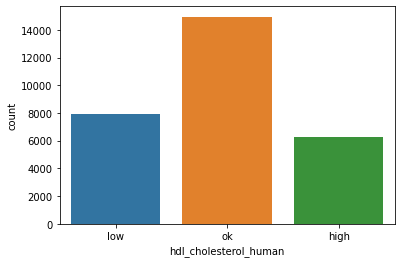

In [11]:
sns.countplot(train["hdl_cholesterol_human"])

In [12]:
absorbance= train.iloc[:,1:]
absorbance.head()

,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,...,absorbance168,absorbance169,id,std,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,donation_id
0,0.528200,0.529795,0.537382,0.540265,0.546260,0.550882,0.558865,0.571352,0.585775,0.600688,...,1.319344,1.278294,0,0.0026,39.27,44.17,low,ok,high,2250
1,0.534852,0.541075,0.544269,0.546594,0.555183,0.561367,0.567637,0.582427,0.595801,0.608619,...,1.282723,1.267465,1,0.0026,39.39,44.09,low,ok,high,2250
2,0.532036,0.540413,0.541964,0.549347,0.555902,0.561458,0.567824,0.579568,0.593048,0.607972,...,1.287730,1.266464,2,0.0026,39.50,44.00,low,ok,high,2250
3,0.531880,0.539558,0.542433,0.549097,0.556224,0.561398,0.566963,0.577525,0.591982,0.607109,...,1.314408,1.342224,3,0.0026,39.60,43.89,low,ok,high,2250
4,0.536424,0.538207,0.541504,0.550546,0.555203,0.560394,0.567352,0.579438,0.592049,0.606031,...,1.268710,1.216146,4,0.0026,39.70,43.83,low,ok,high,2250


# **ok hdl cholesterol human**

In [13]:
absorbance_chl_ok=absorbance.loc[absorbance["hdl_cholesterol_human"]=="ok"]
absorbance_chl_ok

,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,...,absorbance168,absorbance169,id,std,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,donation_id
120,0.263421,0.276113,0.295767,0.308136,0.326004,0.343413,0.354211,0.366916,0.380033,0.396238,...,1.189896,1.146398,120,0.0029,35.68,63.07,ok,ok,high,7148
121,0.269873,0.281146,0.298880,0.313313,0.331729,0.347132,0.360375,0.371067,0.385986,0.400128,...,1.225997,1.173437,121,0.0029,35.78,62.93,ok,ok,high,7148
122,0.260078,0.277421,0.290859,0.308253,0.325577,0.342701,0.353434,0.365804,0.378778,0.393731,...,1.175716,1.102523,122,0.0029,35.87,62.64,ok,ok,high,7148
123,0.263994,0.277310,0.296506,0.306335,0.325179,0.341998,0.354920,0.364946,0.381665,0.396045,...,1.169683,1.156959,123,0.0029,35.98,62.37,ok,ok,high,7148
124,0.262741,0.274480,0.294710,0.309601,0.325123,0.341195,0.354190,0.367253,0.380784,0.395839,...,1.165926,1.152439,124,0.0029,36.09,62.12,ok,ok,high,7148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28975,0.466329,0.471774,0.473000,0.479165,0.485777,0.492668,0.499211,0.507272,0.517505,0.530370,...,1.286931,1.288952,35895,0.0103,45.37,38.31,ok,ok,ok,2011
28976,0.463938,0.470824,0.474715,0.480820,0.486139,0.492812,0.501163,0.508024,0.518442,0.530872,...,1.296153,1.273343,35896,0.0103,45.40,38.20,ok,ok,ok,2011
28977,0.469088,0.470899,0.475604,0.479488,0.485342,0.495506,0.500388,0.506867,0.518168,0.531123,...,1.337654,1.262223,35897,0.0103,45.43,38.20,ok,ok,ok,2011
28978,0.466412,0.471840,0.476937,0.480564,0.486931,0.493977,0.500531,0.507808,0.519212,0.531649,...,1.286799,1.208637,35898,0.0103,45.47,38.20,ok,ok,ok,2011


In [14]:
absorbance_chl_ok=absorbance_chl_ok.sort_values(by="temperature")
absorbance_chl_ok

,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,...,absorbance168,absorbance169,id,std,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,donation_id
10020,0.497901,0.500435,0.508651,0.516286,0.522900,0.526206,0.528476,0.538509,0.552784,0.565836,...,1.163113,1.146077,10020,0.0058,32.08,34.63,ok,ok,ok,4249
10021,0.494042,0.496169,0.503885,0.512601,0.519617,0.523142,0.530472,0.535767,0.550208,0.564183,...,1.138065,1.117382,10021,0.0058,32.21,34.53,ok,ok,ok,4249
10022,0.499173,0.503951,0.510068,0.516521,0.522696,0.527403,0.530418,0.539119,0.554714,0.565908,...,1.154843,1.166719,10022,0.0058,32.34,34.32,ok,ok,ok,4249
10023,0.496517,0.495483,0.509788,0.515155,0.523596,0.526319,0.530508,0.539724,0.552672,0.566963,...,1.090468,1.134286,10023,0.0058,32.48,34.25,ok,ok,ok,4249
10024,0.495112,0.494832,0.508203,0.516817,0.523202,0.527637,0.529416,0.537197,0.552063,0.564337,...,1.142608,1.112690,10024,0.0058,32.59,34.16,ok,ok,ok,4249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5924,0.558830,0.567746,0.572346,0.579545,0.584144,0.592877,0.597024,0.605889,0.623345,0.638829,...,1.292105,1.301443,5924,0.0046,52.68,27.97,ok,ok,high,4122
5917,0.559459,0.562679,0.569459,0.578118,0.584720,0.591218,0.597157,0.605963,0.620945,0.636365,...,1.317072,1.289132,5917,0.0046,52.69,27.97,ok,ok,high,4122
5920,0.561055,0.559292,0.572203,0.579516,0.587369,0.589889,0.595585,0.604710,0.622428,0.637324,...,1.294953,1.317971,5920,0.0046,52.69,27.97,ok,ok,high,4122
5919,0.559375,0.561774,0.570697,0.579101,0.583702,0.590909,0.597535,0.606644,0.622269,0.635397,...,1.282784,1.249679,5919,0.0046,52.69,27.97,ok,ok,high,4122


In [15]:
absorbance_chl_ok.iloc[1:4,0:171]

,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,...,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,id,std
10021,0.494042,0.496169,0.503885,0.512601,0.519617,0.523142,0.530472,0.535767,0.550208,0.564183,...,1.210252,1.209743,1.176968,1.151920,1.133494,1.128968,1.138065,1.117382,10021,0.0058
10022,0.499173,0.503951,0.510068,0.516521,0.522696,0.527403,0.530418,0.539119,0.554714,0.565908,...,1.229750,1.212185,1.168594,1.156900,1.134830,1.155297,1.154843,1.166719,10022,0.0058
10023,0.496517,0.495483,0.509788,0.515155,0.523596,0.526319,0.530508,0.539724,0.552672,0.566963,...,1.223153,1.194850,1.166217,1.160799,1.143916,1.119348,1.090468,1.134286,10023,0.0058


In [16]:
absorbance_chl_ok.iloc[1:4,0:169]

,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,...,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169
10021,0.494042,0.496169,0.503885,0.512601,0.519617,0.523142,0.530472,0.535767,0.550208,0.564183,...,1.245811,1.228406,1.210252,1.209743,1.176968,1.151920,1.133494,1.128968,1.138065,1.117382
10022,0.499173,0.503951,0.510068,0.516521,0.522696,0.527403,0.530418,0.539119,0.554714,0.565908,...,1.252263,1.232005,1.229750,1.212185,1.168594,1.156900,1.134830,1.155297,1.154843,1.166719
10023,0.496517,0.495483,0.509788,0.515155,0.523596,0.526319,0.530508,0.539724,0.552672,0.566963,...,1.238532,1.237924,1.223153,1.194850,1.166217,1.160799,1.143916,1.119348,1.090468,1.134286


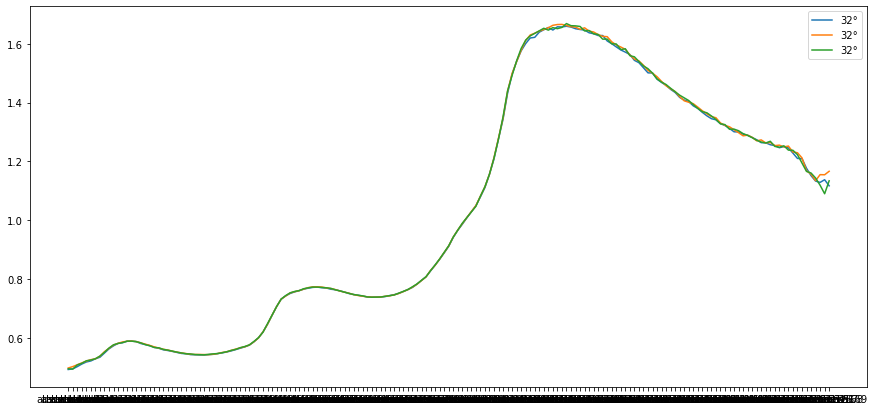

In [17]:
plt.figure(figsize=(15,7)) #temperature 32
plt.plot(absorbance_chl_ok.iloc[1,0:169],label="32°")
plt.plot(absorbance_chl_ok.iloc[2,0:169],label="32°")
plt.plot(absorbance_chl_ok.iloc[3,0:169],label="32°")
plt.legend()
plt.show()

In [18]:
absorbance_chl_ok["temperature"][3110:3120]

14743    38.87
907      38.87
27190    38.87
1666     38.87
15820    38.87
18184    38.87
2698     38.87
15573    38.87
10120    38.87
7724     38.87
Name: temperature, dtype: float64

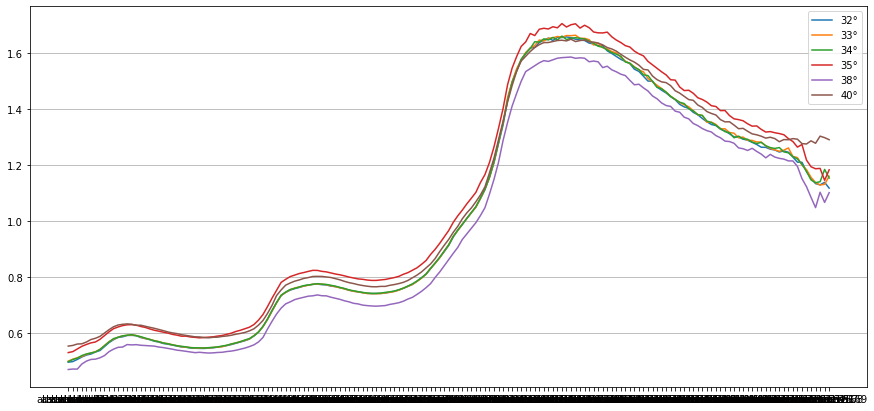

In [19]:
plt.figure(figsize=(15,7)) #temperature 32 et 33 et 34 et 35
plt.plot(absorbance_chl_ok.iloc[1,0:169],label="32°") #32
plt.plot(absorbance_chl_ok.iloc[10,0:169],label="33°") #33
plt.plot(absorbance_chl_ok.iloc[23,0:169], label="34°") #34
plt.plot(absorbance_chl_ok.iloc[45,0:169],label="35°") #35
#plt.plot(absorbance_chl_ok.iloc[72,0:170])
plt.plot(absorbance_chl_ok.iloc[1075,0:169],label="38°")#38
plt.plot(absorbance_chl_ok.iloc[3000,0:169],label="40°")
plt.grid(visible='True',axis='y')
plt.legend()
plt.show()

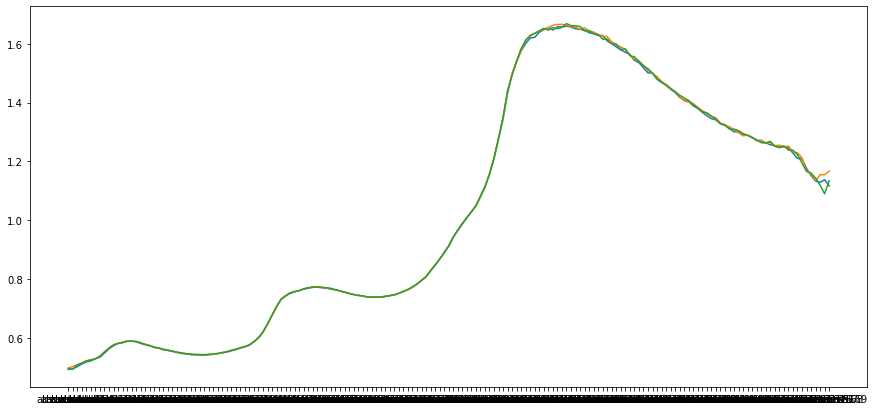

In [20]:
plt.figure(figsize=(15,7)) #temperature 32
plt.plot(absorbance_chl_ok.iloc[1,0:169])
plt.plot(absorbance_chl_ok.iloc[2,0:169])
plt.plot(absorbance_chl_ok.iloc[3,0:169])

# **Low hdl cholesterol human**

In [21]:
absorbance_chl_low=absorbance.loc[absorbance["hdl_cholesterol_human"]=="low"]
absorbance_chl_low

,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,...,absorbance168,absorbance169,id,std,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,donation_id
0,0.528200,0.529795,0.537382,0.540265,0.546260,0.550882,0.558865,0.571352,0.585775,0.600688,...,1.319344,1.278294,0,0.0026,39.27,44.17,low,ok,high,2250
1,0.534852,0.541075,0.544269,0.546594,0.555183,0.561367,0.567637,0.582427,0.595801,0.608619,...,1.282723,1.267465,1,0.0026,39.39,44.09,low,ok,high,2250
2,0.532036,0.540413,0.541964,0.549347,0.555902,0.561458,0.567824,0.579568,0.593048,0.607972,...,1.287730,1.266464,2,0.0026,39.50,44.00,low,ok,high,2250
3,0.531880,0.539558,0.542433,0.549097,0.556224,0.561398,0.566963,0.577525,0.591982,0.607109,...,1.314408,1.342224,3,0.0026,39.60,43.89,low,ok,high,2250
4,0.536424,0.538207,0.541504,0.550546,0.555203,0.560394,0.567352,0.579438,0.592049,0.606031,...,1.268710,1.216146,4,0.0026,39.70,43.83,low,ok,high,2250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29155,0.509514,0.518283,0.515549,0.524022,0.534640,0.539080,0.547709,0.554114,0.565356,0.578284,...,1.256114,1.230291,36075,0.0098,45.56,37.06,low,ok,high,1994
29156,0.506805,0.516050,0.515671,0.524122,0.533260,0.541893,0.549637,0.555640,0.567056,0.580271,...,1.272904,1.277773,36076,0.0098,45.58,37.06,low,ok,high,1994
29157,0.513587,0.518896,0.522462,0.527175,0.536588,0.544938,0.549799,0.558040,0.569934,0.582782,...,1.233271,1.224521,36077,0.0098,45.58,37.01,low,ok,high,1994
29158,0.514809,0.519394,0.520022,0.525574,0.536736,0.545202,0.548561,0.556623,0.567636,0.580994,...,1.228299,1.242985,36078,0.0098,45.60,36.97,low,ok,high,1994


In [22]:
absorbance_chl_low=absorbance_chl_low.sort_values(by="temperature")
absorbance_chl_low

,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,...,absorbance168,absorbance169,id,std,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,donation_id
11100,0.530852,0.537067,0.547491,0.558269,0.572445,0.575204,0.579465,0.587911,0.593434,0.605822,...,1.200975,1.140606,11100,0.0067,30.48,41.92,low,ok,ok,3920
11101,0.535315,0.542561,0.547434,0.561881,0.571532,0.579057,0.579914,0.587500,0.594408,0.608535,...,1.205692,1.140294,11101,0.0067,30.62,41.76,low,ok,ok,3920
11102,0.527428,0.534814,0.544746,0.553972,0.568183,0.575316,0.579338,0.585056,0.591434,0.607962,...,1.152076,1.172911,11102,0.0067,30.74,41.59,low,ok,ok,3920
11103,0.530783,0.538922,0.548906,0.559664,0.568846,0.575551,0.579948,0.584247,0.591687,0.604174,...,1.158145,1.139981,11103,0.0067,30.85,41.44,low,ok,ok,3920
11104,0.531475,0.540595,0.545896,0.555807,0.570942,0.578150,0.580890,0.584813,0.594971,0.608013,...,1.199219,1.209827,11104,0.0067,30.98,41.28,low,ok,ok,3920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,0.404596,0.410995,0.412404,0.422561,0.425675,0.431278,0.434337,0.446192,0.460721,0.473483,...,1.283859,1.323676,7375,0.0049,51.86,24.05,low,ok,ok,6362
7376,0.408030,0.401551,0.404866,0.422449,0.425334,0.432161,0.435360,0.450016,0.458787,0.471914,...,1.270665,1.222629,7376,0.0049,51.88,24.00,low,ok,ok,6362
7377,0.398006,0.409441,0.410630,0.420413,0.431572,0.432343,0.436075,0.446835,0.455835,0.472617,...,1.280870,1.279627,7377,0.0049,51.91,23.95,low,ok,ok,6362
7378,0.425432,0.420669,0.421620,0.431932,0.438511,0.444325,0.443679,0.459353,0.469753,0.480670,...,1.312795,1.263790,7378,0.0049,51.92,23.95,low,ok,ok,6362


In [23]:
absorbance_chl_low["temperature"][1270:1280]

18514    38.13
1480     38.13
14184    38.13
17607    38.13
25707    38.13
16886    38.14
15017    38.14
20881    38.14
7301     38.14
27744    38.14
Name: temperature, dtype: float64

<AxesSubplot:>

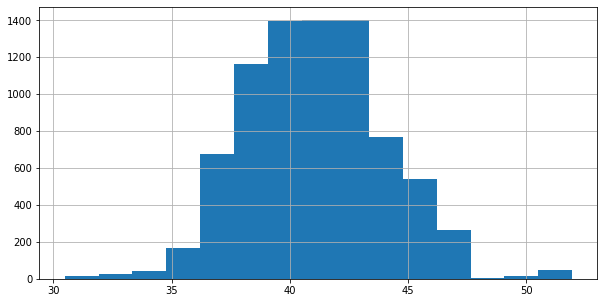

In [24]:
plt.figure(figsize=(10,5))
absorbance_chl_low["temperature"].hist(bins=15)

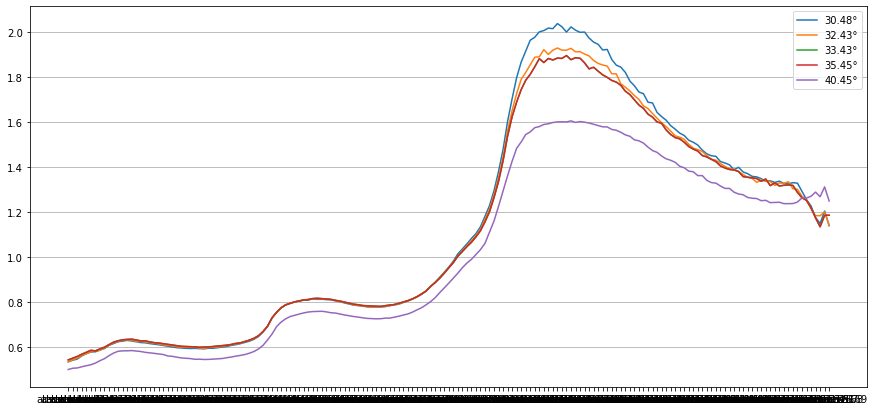

In [25]:
plt.figure(figsize=(15,7)) #temperature 30
plt.plot(absorbance_chl_low.iloc[1,0:169],label="30.48°")
plt.plot(absorbance_chl_low.iloc[20,0:169],label="32.43°")
plt.plot(absorbance_chl_low.iloc[43,0:169],label="33.43°")
plt.plot(absorbance_chl_low.iloc[43,0:169],label="35.45°")
plt.plot(absorbance_chl_low.iloc[1279,0:169],label="40.45°")
plt.grid(visible='True',axis='y')
plt.legend()
plt.show()

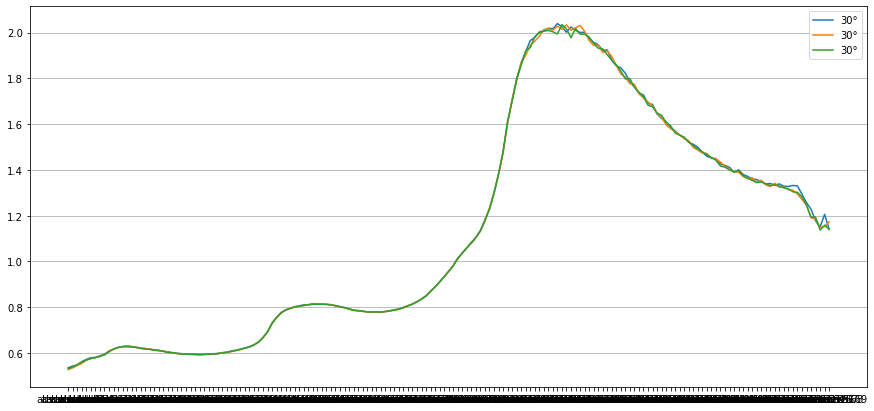

In [26]:
plt.figure(figsize=(15,7)) #temperature 30
plt.plot(absorbance_chl_low.iloc[1,0:169],label="30°")
plt.plot(absorbance_chl_low.iloc[2,0:169],label="30°")
plt.plot(absorbance_chl_low.iloc[3,0:169],label="30°")
plt.grid(visible='True',axis='y')
plt.legend()
plt.show()

# **low vs ok vs high**

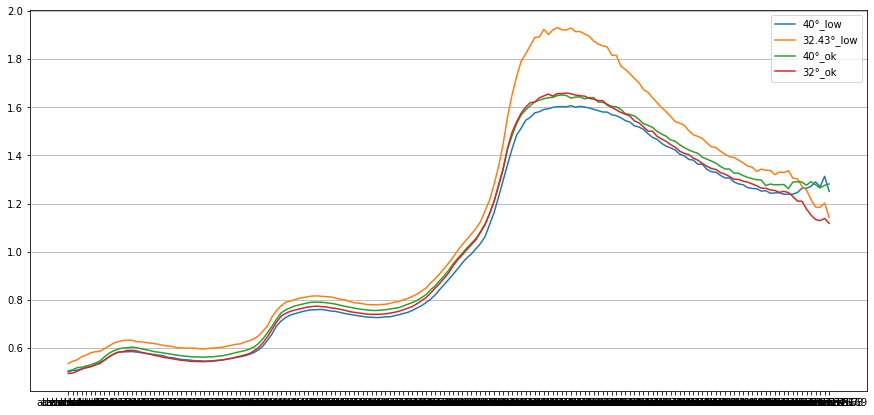

In [27]:
#low vs ok
plt.figure(figsize=(15,7))
plt.plot(absorbance_chl_low.iloc[1279,0:169],label="40°_low")
plt.plot(absorbance_chl_low.iloc[20,0:169],label="32.43°_low")
plt.plot(absorbance_chl_ok.iloc[3120,0:169],label="40°_ok")
plt.plot(absorbance_chl_ok.iloc[1,0:169],label="32°_ok") #32
plt.grid(visible='True',axis='y')
plt.legend()
plt.show()

# **Hemoglobin human**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hemoglobin(hgb)_human', ylabel='count'>

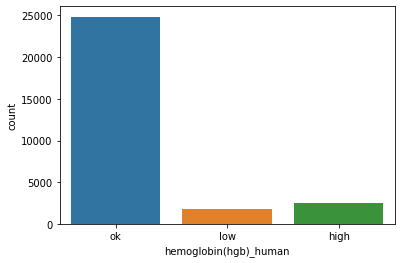

In [28]:
sns.countplot(train["hemoglobin(hgb)_human"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cholesterol_ldl_human', ylabel='count'>

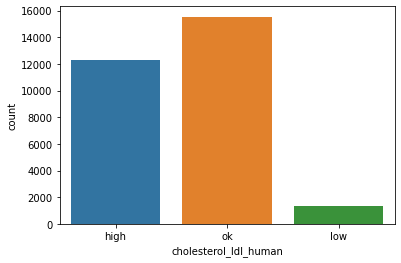

In [29]:
sns.countplot(train["cholesterol_ldl_human"])

In [30]:
train.iloc[0, 1:173]

absorbance1        0.5282
absorbance2      0.529795
absorbance3      0.537382
absorbance4      0.540265
absorbance5       0.54626
                   ...   
absorbance168    1.319344
absorbance169    1.278294
id                      0
std                0.0026
temperature         39.27
Name: 0, Length: 172, dtype: object

In [31]:
train.head()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance168,absorbance169,id,std,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,donation_id
0,0.520883,0.528200,0.529795,0.537382,0.540265,0.546260,0.550882,0.558865,0.571352,0.585775,...,1.319344,1.278294,0,0.0026,39.27,44.17,low,ok,high,2250
1,0.529109,0.534852,0.541075,0.544269,0.546594,0.555183,0.561367,0.567637,0.582427,0.595801,...,1.282723,1.267465,1,0.0026,39.39,44.09,low,ok,high,2250
2,0.528434,0.532036,0.540413,0.541964,0.549347,0.555902,0.561458,0.567824,0.579568,0.593048,...,1.287730,1.266464,2,0.0026,39.50,44.00,low,ok,high,2250
3,0.530528,0.531880,0.539558,0.542433,0.549097,0.556224,0.561398,0.566963,0.577525,0.591982,...,1.314408,1.342224,3,0.0026,39.60,43.89,low,ok,high,2250
4,0.527530,0.536424,0.538207,0.541504,0.550546,0.555203,0.560394,0.567352,0.579438,0.592049,...,1.268710,1.216146,4,0.0026,39.70,43.83,low,ok,high,2250


You can drop the id column and then convert the data to numpy array

In [32]:
train.drop(["id","std","donation_id"], axis=1, inplace=True)
data = train.to_numpy()
print(data.shape) # 219 IDs

(29160, 175)


In [33]:
train.head()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,0.520883,0.528200,0.529795,0.537382,0.540265,0.546260,0.550882,0.558865,0.571352,0.585775,...,1.310330,1.353629,1.336609,1.319344,1.278294,39.27,44.17,low,ok,high
1,0.529109,0.534852,0.541075,0.544269,0.546594,0.555183,0.561367,0.567637,0.582427,0.595801,...,1.286939,1.301804,1.314457,1.282723,1.267465,39.39,44.09,low,ok,high
2,0.528434,0.532036,0.540413,0.541964,0.549347,0.555902,0.561458,0.567824,0.579568,0.593048,...,1.310330,1.311108,1.283048,1.287730,1.266464,39.50,44.00,low,ok,high
3,0.530528,0.531880,0.539558,0.542433,0.549097,0.556224,0.561398,0.566963,0.577525,0.591982,...,1.306762,1.297632,1.314811,1.314408,1.342224,39.60,43.89,low,ok,high
4,0.527530,0.536424,0.538207,0.541504,0.550546,0.555203,0.560394,0.567352,0.579438,0.592049,...,1.285386,1.295650,1.290355,1.268710,1.216146,39.70,43.83,low,ok,high


In [34]:
train.iloc[:,:172]

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
0,0.520883,0.528200,0.529795,0.537382,0.540265,0.546260,0.550882,0.558865,0.571352,0.585775,...,1.313583,1.313329,1.312243,1.310330,1.353629,1.336609,1.319344,1.278294,39.27,44.17
1,0.529109,0.534852,0.541075,0.544269,0.546594,0.555183,0.561367,0.567637,0.582427,0.595801,...,1.316063,1.320698,1.321068,1.286939,1.301804,1.314457,1.282723,1.267465,39.39,44.09
2,0.528434,0.532036,0.540413,0.541964,0.549347,0.555902,0.561458,0.567824,0.579568,0.593048,...,1.322394,1.328299,1.311948,1.310330,1.311108,1.283048,1.287730,1.266464,39.50,44.00
3,0.530528,0.531880,0.539558,0.542433,0.549097,0.556224,0.561398,0.566963,0.577525,0.591982,...,1.321111,1.320285,1.303363,1.306762,1.297632,1.314811,1.314408,1.342224,39.60,43.89
4,0.527530,0.536424,0.538207,0.541504,0.550546,0.555203,0.560394,0.567352,0.579438,0.592049,...,1.325618,1.297339,1.309712,1.285386,1.295650,1.290355,1.268710,1.216146,39.70,43.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29155,0.506799,0.509514,0.518283,0.515549,0.524022,0.534640,0.539080,0.547709,0.554114,0.565356,...,1.250759,1.250332,1.229288,1.237568,1.218815,1.256224,1.256114,1.230291,45.56,37.06
29156,0.510311,0.506805,0.516050,0.515671,0.524122,0.533260,0.541893,0.549637,0.555640,0.567056,...,1.266971,1.259215,1.237173,1.247183,1.255282,1.238389,1.272904,1.277773,45.58,37.06
29157,0.511655,0.513587,0.518896,0.522462,0.527175,0.536588,0.544938,0.549799,0.558040,0.569934,...,1.258552,1.257397,1.257831,1.223087,1.225120,1.258358,1.233271,1.224521,45.58,37.01
29158,0.512617,0.514809,0.519394,0.520022,0.525574,0.536736,0.545202,0.548561,0.556623,0.567636,...,1.254205,1.250332,1.251949,1.240284,1.240556,1.222339,1.228299,1.242985,45.60,36.97


The first 170 columns are the abosrbance values, 170 to 172 are the temperature and humidity of the scanner, and the last 3 columns are the values you want to your model to predict 

In [35]:
train.iloc[:, 172:]

,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,low,ok,high
1,low,ok,high
2,low,ok,high
3,low,ok,high
4,low,ok,high
...,...,...,...
29155,low,ok,high
29156,low,ok,high
29157,low,ok,high
29158,low,ok,high


In [36]:
features = np.array(data[:,:172], dtype=float)
labels = data[:, 172:]

So using these features and labels, you can go ahead to train you machine learning

## Saving the predictions

In [37]:
test = pd.read_csv(testcsv)
test.head()

,Reading_ID,donation_id,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,...,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,id,std,temperature,humidity
0,ID_KWUAQLRM,ID_2982,0.517951,0.520508,0.526852,0.531611,0.536816,0.543828,0.547761,0.554379,...,1.226695,1.210430,1.214422,1.200332,1.198297,1.248182,0,0.0027,37.09,27.22
1,ID_FN8SIVJJ,ID_2982,0.517839,0.522367,0.525186,0.534661,0.541900,0.546180,0.551687,0.556753,...,1.219627,1.216220,1.191416,1.202515,1.211942,1.242939,1,0.0027,37.20,27.17
2,ID_CI4TQCHI,ID_2982,0.517702,0.522018,0.527237,0.534374,0.541155,0.547152,0.549837,0.557513,...,1.237193,1.208477,1.208721,1.187810,1.209599,1.175631,2,0.0027,37.30,27.07
3,ID_URJMKNU7,ID_2982,0.525008,0.527439,0.536871,0.539636,0.546555,0.553183,0.558826,0.563549,...,1.218532,1.185708,1.196750,1.222484,1.177406,1.198399,3,0.0027,37.38,26.98
4,ID_HBJH67IS,ID_2982,0.520532,0.522683,0.526842,0.534634,0.539676,0.547488,0.552688,0.558355,...,1.206383,1.204950,1.203311,1.191351,1.157577,1.212008,4,0.0027,37.48,26.89


In [38]:
# save it ids before dropping them
idx = test.donation_id.values
test.drop(["Reading_ID","id","std","donation_id"], axis=1, inplace=True)
testdata = test.to_numpy()

In [39]:
print(testdata.shape) # 61 Individuals

(3660, 172)


### Basic model example

The goal of the project is to classify the level of cholesterol low, cholesterol high and hemoglobin. Your prediction should be something of the form ok, low and high. So you will to build and train a multioutput classfier. Below is basic example using sklearn.

Key:
low  = 0,
ok   = 1,
high = 2

In [40]:
labels_n = np.zeros(labels.shape)
labels_n[np.where(labels=='low')] = 0
labels_n[np.where(labels=='ok')] = 1
labels_n[np.where(labels=='high')] = 2

In [41]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [42]:
n_samples, n_features = features.shape
n_outputs = labels_n.shape[1]
n_classes = 3
#forest = RandomForestClassifier(random_state=1)
#forest= KNeighborsClassifier()
forest= DecisionTreeClassifier(random_state=1)

multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
#multi_target_forest= OutputCodeClassifier(forest,n_jobs=-1)
#multi_target_forest=ClassifierChain(forest, order='random',cv=3, random_state=0)
model = multi_target_forest.fit(features, labels_n)

In [43]:
multi_target_forest.score(features, labels_n)

1.0

In [44]:
def mymodel(features):
    output = model.predict(features)
    return output

In [45]:
predictions = mymodel(testdata)
# Save the results to csv
ss = pd.DataFrame()
ss["Donation_ID"] = idx # don't messed up the ids. save them before.
ss["hdl_cholesterol_human"] = predictions[:,0]
ss["hemoglobin(hgb)_human"] = predictions[:,1]
ss["cholesterol_ldl_human"] = predictions[:,2]


In [46]:
ss

,Donation_ID,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_2982,1.0,1.0,0.0
1,ID_2982,1.0,1.0,0.0
2,ID_2982,1.0,1.0,0.0
3,ID_2982,1.0,0.0,0.0
4,ID_2982,1.0,1.0,0.0
...,...,...,...,...
3655,ID_3637,1.0,1.0,1.0
3656,ID_3637,1.0,1.0,2.0
3657,ID_3637,1.0,1.0,2.0
3658,ID_3637,1.0,1.0,1.0


In [47]:
submission=pd.read_csv("../input/blood-multiclass/Updated_Sample_Submission.csv")

In [48]:
submission.head()

,Donation_ID,target
0,ID_1961_cholesterol_ldl_human,ok
1,ID_1961_hdl_cholesterol_human,ok
2,ID_1961_hemoglobin(hgb)_human,ok
3,ID_2067_cholesterol_ldl_human,ok
4,ID_2067_hdl_cholesterol_human,ok


##### - We need to transform our predictions from 0, 1, 2 to low, ok, high respectively 

In [49]:
def transform(value):
    if value == 0.0:
        return 'low'
    elif value == 1.0:
        return 'ok'
    else:
        return 'high'
        

In [50]:
ss["hdl_cholesterol_human"] = ss["hdl_cholesterol_human"].apply(lambda x: transform(x))
ss["hemoglobin(hgb)_human"] = ss["hemoglobin(hgb)_human"].apply(lambda x: transform(x))
ss["cholesterol_ldl_human"] = ss["cholesterol_ldl_human"].apply(lambda x: transform(x))

In [51]:
ss.head()

,Donation_ID,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_2982,ok,ok,low
1,ID_2982,ok,ok,low
2,ID_2982,ok,ok,low
3,ID_2982,ok,low,low
4,ID_2982,ok,ok,low


#### -  Convert our submission as per the sample submission 

In [52]:
def transform_c_hdl(row):
    return str(row["Donation_ID"]) + "_hdl_cholesterol_human" + "-" +  row["hdl_cholesterol_human"]

In [53]:
hdl_rows = pd.DataFrame(ss.apply(transform_c_hdl, axis=1))

In [54]:
def transform_hemo(row):
    return str(row["Donation_ID"]) + "_hemoglobin(hgb)_human" +  "-" + row["hemoglobin(hgb)_human"]

In [55]:
hemo_rows = pd.DataFrame(ss.apply(transform_hemo, axis=1))

In [56]:
def transform_c_ldl(row):
    return str(row["Donation_ID"]) + "_cholesterol_ldl_human" +  "-" + row["cholesterol_ldl_human"]

In [57]:
ldl_rows = pd.DataFrame(ss.apply(transform_c_ldl, axis=1))

In [58]:
ss = pd.concat([hdl_rows, hemo_rows, ldl_rows]).reset_index(drop=True)

In [59]:
ss["target"] = ss[0].apply(lambda x: x.split("-")[1])
ss[0] = ss[0].apply(lambda x: x.split("-")[0])

In [60]:
ss = ss.rename(columns={0:"Donation_ID"})

In [61]:
ss.head()

,Donation_ID,target
0,ID_2982_hdl_cholesterol_human,ok
1,ID_2982_hdl_cholesterol_human,ok
2,ID_2982_hdl_cholesterol_human,ok
3,ID_2982_hdl_cholesterol_human,ok
4,ID_2982_hdl_cholesterol_human,ok


In [62]:
ss.to_csv("./SaharBenMabrouk7.csv", index=False)

### To Do
- Try other models,
- Cross validation